# Data Preparation for Model Input - Creating Facial Landmarks
## Introduction

This report outlines the process of implementing Multi-task Cascaded Convolutional Networks (MTCNN) for facial landmark detection and integrating it into a photogrammetry-based 3D facial reconstruction project. The project is guided by the DOT Framework from ICT Research Methods and the IBM Data Science Methodology to ensure a structured and systematic approach.

## Project Implementation
1. **Design Phase - Business Understanding** 

    - **Objective:**
        - Detect facial landmarks using MTCNN and use these landmarks for 3D facial reconstruction in our photogrammetry project as a proof of concept.
    - **Requirements:**
        - Reliable detection of facial landmarks with MTCNNs.
        - Accurate 3D facial reconstruction with 3D Face Reconstruction by Pytorch.
        - Use of GPU acceleration for real-time performance with the CUDA Tool Kit from NVIDIA.
2. **Operation Phase - Data Collection, Data Preparation, Modeling**

    - **Step 1: Data Collection**

        - **Capture Data:** 
            - Using LiDAR on an iPhone 14 Pro to capture detailed facial information.
        - **Exporting Data:** 
            - Export captured data in formats like png or jpeg for further processing.
    
    - **Step 2: Data Preparation & Modeling**
        - **Facial Landmark Detection:**
            - The collected images are processed using MTCNN to detect facial landmarks. MTCNN provides coordinates of key facial features (eyes, nose, mouth) and a bounding box for the face.
        - **Model Input Preparation:**
            - The values of the detected facial landmarks, along with the image itself, are used as input for the 3D facial reconstruction model.

## Install Required Python Packages

In [3]:
pip install mtcnn tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.16

## Detect Facial Landmarks Using MTCNN

### Explanation of MTCNNs
- MTCNN is a face detection method that uses a cascade of neural networks to detect faces and facial landmarks in images.
### Detecting Faces and Facial Landmarks:
detector.detect_faces(img): This method takes the RGB image as input and returns a list of dictionaries, where each dictionary contains details about a detected face. 

The details include:

- **'box':** Coordinates of the bounding box around the detected face.

- **'confidence':** Confidence score of the detection.

- **'keypoints':** Coordinates of key facial landmarks (left eye, right eye, nose, mouth left, mouth right).



In [14]:
from mtcnn import MTCNN
import cv2

img = cv2.cvtColor(cv2.imread("k.jpg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


[{'box': [199, 143, 187, 251],
  'confidence': 0.9999992847442627,
  'keypoints': {'left_eye': (250, 242),
   'right_eye': (334, 243),
   'nose': (288, 288),
   'mouth_left': (258, 334),
   'mouth_right': (323, 335)}}]

### Output of Kendrick Lamar the Greatest Rapper of All Time
This output indicates that:

- A face was detected with a bounding box starting at coordinates (199, 143) with a width of 187 pixels and a height of 251 pixels.

- The confidence score for this detection is 0.9999992847442627, indicating a very high confidence level.
    
- Key facial landmarks have been detected at the specified coordinates.

(-0.5, 553.5, 553.5, -0.5)

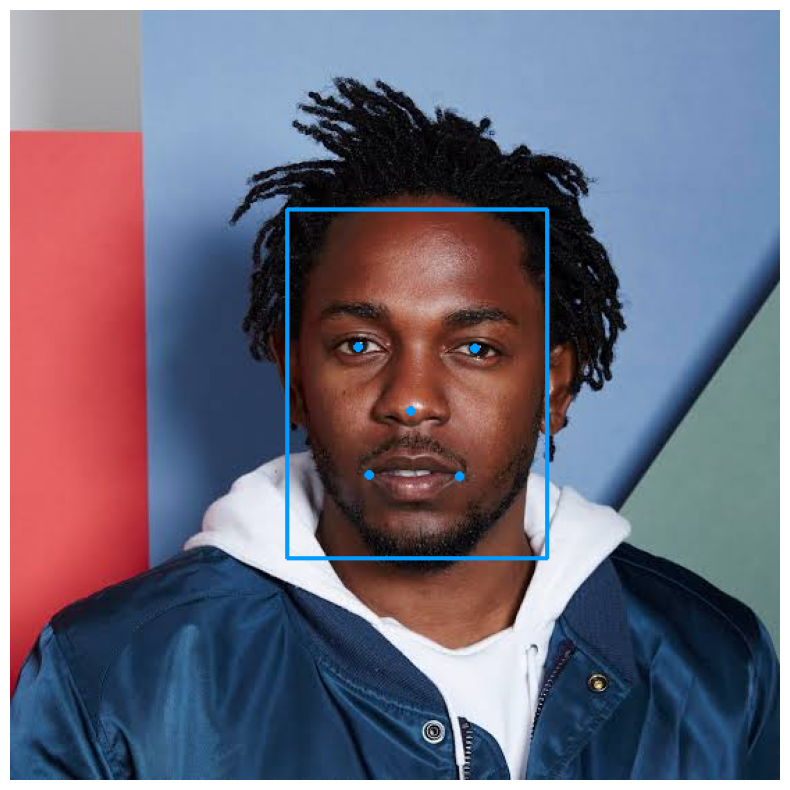

In [15]:
import matplotlib.pyplot as plt

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')

## Summary

In this project, we implemented Multi-task Cascaded Convolutional Networks (MTCNN) to detect facial landmarks and integrated these detections into a photogrammetry-based 3D facial reconstruction workflow. 

The project followed the DOT Framework from ICT Research Methods and the IBM Data Science Methodology to ensure a structured approach.

### Key Steps in the Process:

- **Data Acquisition:** Captured high-resolution images using a camera equipped with LiDAR, such as the iPhone 14 Pro, to gather detailed spatial information about the subjects.
- **Data Preparation:** Processed the captured images by converting them into formats suitable for further processing.
- **Facial Landmark Detection:** Used MTCNN to detect key facial features in the images, such as the eyes, nose, and mouth, and created bounding boxes around the faces.
- **Model Input Preparation:** Utilized the coordinates of the detected facial landmarks and the images themselves as inputs for the 3D facial reconstruction model.
- **3D Facial Reconstruction:** Implemented the facial reconstruction model to generate accurate 3D models of the detected faces using the provided inputs.

### Python Code for MTCNNs:
The provided Python code demonstrates how to read an image, detect facial landmarks using MTCNN, and prepare the results for 3D facial reconstruction. 

The code reads an image, converts it to RGB format, initializes the MTCNN detector, and detects faces and facial landmarks. 

The detected landmarks and bounding boxes are then used as inputs for the 3D reconstruction model.

### Factors Affecting Facial Landmark Detection and Reconstruction:
When creating facial landmarks, it is crucial to consider various factors that can impact the quality of the detection and reconstruction. 

These factors include:

- **Lighting and Shadows:** Poor lighting or harsh shadows can obscure facial features, leading to inaccurate landmark detection.
- **Headgear and Accessories:** Items such as hats, glasses, and beards can cover key facial landmarks and affect the accuracy of the detection.
- **Pose and Expression:** The position of the head and facial expressions can change the appearance of facial landmarks, making detection more challenging.
- **Image Quality:** High-resolution images with minimal noise and distortion are essential for accurate landmark detection.

## Conclusion

Implementing MTCNN for facial landmark detection and integrating it into a photogrammetry-based 3D facial reconstruction workflow provides a robust and efficient method for creating accurate 3D models of human faces. 

By following the DOT Framework and IBM Data Science Methodology, the project ensured a structured approach from design to deployment. 

The key steps involved data acquisition, preparation, landmark detection, and 3D reconstruction, each playing a vital role in the overall process.

To achieve high-quality results, it is important to consider factors such as lighting, shadows, headgear, accessories, and image quality during the data acquisition phase. 

Addressing these factors can significantly enhance the accuracy of facial landmark detection and the resulting 3D facial reconstructions. 

This approach enables the creation of detailed and realistic 3D models, which have numerous applications in fields such as animation, virtual reality, and medical imaging.